#    Trends in USA Visa Application and Decision Prediction

## Step 1: Import all the required libraries

In [1]:
## import library
import pandas as pd
import numpy as np
import difflib as dff

## Imports for different type of classfiers
from sklearn import tree
import sklearn.linear_model as linear_model 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=300000)
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics
from sklearn import preprocessing

import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

## Step 2: Import the dataset in a dataframe

In [2]:
## reading csv file
dataset= pd.read_csv("/Users/ankitgusain/Downloads/h1b_kaggle.csv")

In [3]:
## Removing first colum that is unnecessary
dataset = dataset.iloc[: , 1:]

In [4]:
## checking the top 2 rows of our data set
dataset.head(2)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843


In [5]:
## check number of rows before cleaning
len(dataset)

3002458

In [6]:
## check number of columns before cleaning
len(dataset.columns)

10

In [7]:
## removing null values from selected columns
dataset = dataset.dropna(axis=0, how='any',
                         subset = ['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 
                                   'FULL_TIME_POSITION', 'PREVAILING_WAGE','WORKSITE'])

In [8]:
# taking only 3 case status that are used in our analysis
dataset = dataset.loc[dataset['CASE_STATUS'].isin(["CERTIFIED", "DENIED", "REJECTED"])]

In [9]:
## converting column names to upper case and data conversion
dataset['YEAR'] = dataset['YEAR'].astype(int)
dataset['EMPLOYER_NAME'] = dataset['EMPLOYER_NAME'].str.upper()
dataset['SOC_NAME'] = dataset['SOC_NAME'].str.upper()
dataset['JOB_TITLE'] = dataset['JOB_TITLE'].str.upper()
dataset['FULL_TIME_POSITION'] = dataset['FULL_TIME_POSITION'].str.upper()

In [10]:
## check number of rows after cleaning the dataset
len(dataset)

2694004

<span style='color:Black'></span>
#  Trends in our data 

<span style='color:Black'></span>
## Top 10 SOC for which visas are filed - Data Analysis 1

Text(0, 0.5, 'SOC')

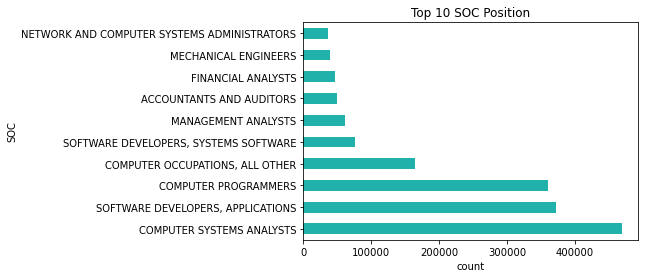

In [11]:
top10_SOC = dataset['SOC_NAME'].value_counts()[:10].plot.barh(title= "Top 10 SOC Position",color='lightseagreen',figsize=(6,4), sort_columns='true')
top10_SOC.set_xlabel('count')
top10_SOC.set_ylabel('SOC')

<span style='color:Black'></span>
##  Top 10 Employers who filed visas - Data Analysis 2

Text(0, 0.5, 'Employer Name')

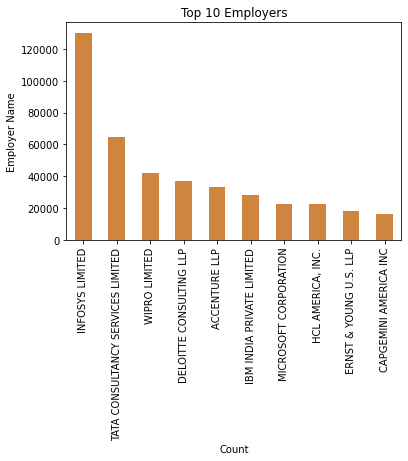

In [12]:
top10_SOC = dataset['EMPLOYER_NAME'].value_counts()[:10].plot.bar(title= "Top 10 Employers",color='peru',figsize=(6,4))
top10_SOC.set_xlabel('Count')
top10_SOC.set_ylabel('Employer Name')

## Acceptance rate of the Visa Application in different years - Data Analysis 3

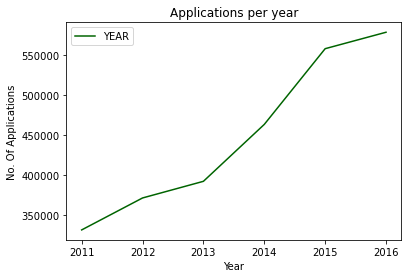

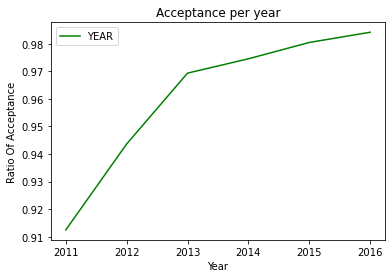

In [52]:
dfplot_status_year = pd.DataFrame(dataset['YEAR'].value_counts())
dfplot_status_year = dfplot_status_year.sort_values(['YEAR'])
plot_status_year = dfplot_status_year.plot(title = 'Applications per year', kind = 'line',color='darkgreen')
plot_status_year.set_xlabel('Year')
plot_status_year.set_ylabel('No. Of Applications')
plt.show()

dfstatus_acceptance_yearly = pd.DataFrame(dataset[dataset['CASE_STATUS'] == 'CERTIFIED'].YEAR.value_counts() / dataset.YEAR.value_counts())
dfstatus_acceptance_yearly = dfstatus_acceptance_yearly.sort_values(['YEAR'])
status_acceptance_yearly = dfstatus_acceptance_yearly.plot(title = 'Acceptance per year', kind = 'line',color='green')
status_acceptance_yearly.set_xlabel('Year')
status_acceptance_yearly.set_ylabel('Ratio Of Acceptance')
plt.show()

### consider only certified or declined case status

In [14]:
print(dataset['CASE_STATUS'].unique())
dataset = dataset.loc[dataset['CASE_STATUS'].isin(["CERTIFIED", "DENIED"])]

['CERTIFIED' 'DENIED' 'REJECTED']


### Check if we have null values

In [15]:
dataset.isnull().sum(axis = 0)

CASE_STATUS               0
EMPLOYER_NAME             0
SOC_NAME                  0
JOB_TITLE                 0
FULL_TIME_POSITION        0
PREVAILING_WAGE           0
YEAR                      0
WORKSITE                  0
lon                   96727
lat                   96727
dtype: int64

### number of certified and denied of all the needed columns with their count

In [16]:
print(dataset.shape)
#print(table_3.shape)

(2694002, 10)


In [17]:
# check count for certified and denied case_status
dataset.CASE_STATUS.value_counts()

CERTIFIED    2600241
DENIED         93761
Name: CASE_STATUS, dtype: int64

### Downsampling the Data to match the ratio of certified and denied samples

In [18]:
dataset_Dx = dataset[dataset['CASE_STATUS'] == 'DENIED']

In [19]:
dataset_Cx = dataset[dataset['CASE_STATUS'] == 'CERTIFIED']

In [20]:
Input_Certified, Input_Certified_extra, y_certified, y_certified_extra = train_test_split(dataset[dataset.CASE_STATUS == 'CERTIFIED'],\
                                                                                          dataset_Cx.CASE_STATUS, train_size= 0.06, random_state=1)


In [21]:
training_dataframe = Input_Certified.append(dataset_Dx)

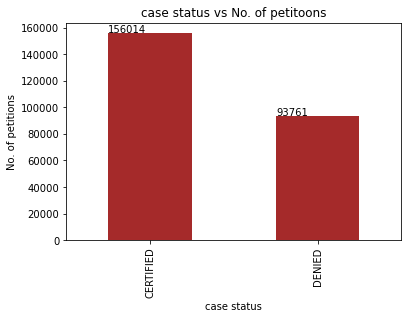

In [22]:
## plot the distribution of the certified and denied samples after downsampling
plot_after_ds = training_dataframe['CASE_STATUS'].value_counts().plot(title = 'case status vs No. of petitoons', \
                                                                kind = 'bar', color = 'brown')
plot_after_ds.set_xlabel("case status")
plot_after_ds.set_ylabel("No. of petitions")
for p in plot_after_ds.patches:
    plot_after_ds.annotate(str(p.get_height()), (p.get_x() * 1.0050, p.get_height() * 1.005))
plt.show()

# Features Creation and Categorisation

here we are using one-hot encoding technique to convert categorical data to numerical data. we will feed this categorical data to our model to improve its efficiency.

In [23]:
# one-hot encoding
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  80566
Prevailing Wages  24804
Unique SOCs  983
Unique Job Titles  53272
Unique Filing Year  6
Unique Worksite State  8637
Unique Employment Type  2


### Feature Categorisation Functions

In [24]:
def wage_categorization(wage):
    if wage <=40000:
        return "VERY LOW"
    elif wage >40000 and wage <= 80000:
        return "LOW"
    elif wage >80000 and wage <= 100000:
        return "MEDIUM"
    elif wage >100000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [25]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [26]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

### Feature Creation for One-Hot Encoding

In [27]:
training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)

In [28]:
training_dataframe.WORKSITE.unique()

array(['PENNSYLVANIA', 'TEXAS', 'NEW YORK', 'CALIFORNIA', 'CONNECTICUT',
       'WASHINGTON', 'MISSOURI', 'OREGON', 'VIRGINIA', 'MASSACHUSETTS',
       'OHIO', 'ILLINOIS', 'FLORIDA', 'TENNESSEE', 'IDAHO', 'MARYLAND',
       'GEORGIA', 'NORTH CAROLINA', 'NEBRASKA', 'MINNESOTA', 'DELAWARE',
       'NEW HAMPSHIRE', 'ALABAMA', 'NEW JERSEY', 'WISCONSIN', 'ARIZONA',
       'INDIANA', 'MICHIGAN', 'IOWA', 'COLORADO', 'NEW MEXICO',
       'SOUTH CAROLINA', 'LOUISIANA', 'UTAH', 'KENTUCKY', 'ALASKA',
       'DISTRICT OF COLUMBIA', 'OKLAHOMA', 'ARKANSAS', 'RHODE ISLAND',
       'VERMONT', 'MAINE', 'MISSISSIPPI', 'NA', 'KANSAS', 'NEVADA',
       'HAWAII', 'WYOMING', 'PUERTO RICO', 'WEST VIRGINIA', 'MONTANA',
       'NORTH DAKOTA', 'SOUTH DAKOTA'], dtype=object)

In [29]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [30]:
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]

In [31]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [32]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()

In [33]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)

In [34]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [35]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [36]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  53
Unique Employment Type  2


In [37]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass


In [38]:
training_dataframe['YEAR'] = training_dataframe['YEAR'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'YEAR',\
                                                'WORKSITE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
39,0,2016,WASHINGTON,VERY HIGH,AR,LA,LA,1
47,0,2016,CALIFORNIA,VERY HIGH,AR,LA,LA,1
66,1,2016,GEORGIA,VERY HIGH,VHA,LA,LA,1
70,1,2016,PENNSYLVANIA,VERY HIGH,VHA,LA,LA,1
91,0,2016,MICHIGAN,HIGH,AR,VLA,LA,1


### Apply One-hot encoding

In [39]:
final_df_train = pd.get_dummies(training_dataframe, columns=['YEAR', 'WORKSITE', 'FULL_TIME_POSITION', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE',
                                                             
                                                                'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE' ], drop_first=True)
final_df_train.head(3)

,CASE_STATUS,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
39,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
47,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
66,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### RFE for feature elimination

In [40]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
print(X.shape, y.shape)

(1000, 10) (1000,)


In [41]:
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -27.177 (2.652)


In [42]:
#model = LogisticRegression()
#rfe = RFE(model, 30)
#fit = rfe.fit(final_df_train.iloc[2:,1:], final_df_train.iloc[2:,0])
#support_rfe = rfe.support_
#length_cols = list(final_df_train.iloc[2:,1:].columns.values)
#list_selected = []
#for index in range(len(length_cols)):
   # if support_rfe[index] == True:
  #      list_selected.append(length_cols[index])
 #   else:
#        pass


In [43]:
# scaling our data 
X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=42)
scaler = preprocessing.StandardScaler().fit(X_train)
scaler
StandardScaler()
scaler.mean_
scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

X_scaled.mean(axis=0)
X_scaled.std(axis=0)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [44]:
#X, y = make_classification(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(final_df_train.iloc[:,1:], final_df_train.iloc[:, 0], test_size = 0.20, random_state=42)
#y_test[y_test==1].shape
#pipe = make_pipeline(StandardScaler(), LogisticRegression())
#pipe.fit(X_train, y_train)
#Pipeline(steps=[('standardscaler', StandardScaler()),
 #               ('logisticregression', LogisticRegression())])
#pipe.score(X_test, y_test)

In [46]:
X_train.head(3)

,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
920418,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2662913,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1358974,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


## Logistic Regression Model

In [53]:
lr_clf = linear_model.LogisticRegression()
lr_clf.fit(X_train, y_train)  

/Users/ankitgusain/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
y_pred_lr = lr_clf.predict(X_test)

probs = lr_clf.predict_proba(X_test)

print("test", y_test[:10])
print("pred", y_pred_lr[:10])

print(metrics.confusion_matrix(y_test,y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))

test 842903     1
2885837    0
2974664    1
2878248    1
2894357    1
2013811    1
2500080    1
1242093    1
606752     1
991013     1
Name: CASE_STATUS, dtype: int64
pred [1 0 1 1 1 1 1 0 1 1]
[[14575  4195]
 [ 1235 29950]]
              precision    recall  f1-score   support

           0       0.92      0.78      0.84     18770
           1       0.88      0.96      0.92     31185

    accuracy                           0.89     49955
   macro avg       0.90      0.87      0.88     49955
weighted avg       0.89      0.89      0.89     49955

